`05_eda.ipynb`

# EDA - Exploratory Data Analysis (탐색적 데이터 분석)
> 분석 초기 단계에서 데이터를 다양한 관점에서 관찰, 이해하는 과정

## 주요 내용
0. 가설 수립
1. 데이터 이해
2. 데이터 품질 검사
3. 데이터 시각화
4. 변수 간 관계 분석
5. 가설 검정

## EDA 전략 프레임워크
### 문제 정의와 목적 설정
- 목적) 우리가 해결하려는 비즈니스 문제는 무엇인가
- 의사결정) 이 분석을 통해 누가, 무엇을 결정하는가
- 성공기준) 분석의 P/F 기준은 무엇인가

### 데이터 이해 단계적 접근
- 데이터 개요 파악
- 변수 분류와 우선순위 설정
- 가설 기반 탐색 전략 (xx라면 oo일 것이다)
    - 관찰 - X 변수의 분포는 어떤 특성이 있을것
    - 관계 - X - Y사이의 특정 관계가 있을것
    - 그룹 - A - B 은 특정 변수에서 차이가 있을것


## 데이터 품질의 6가지 차원
- 완전성 (Completeness): 결측값이 얼마나 적은가?
- 정확성 (Accuracy): 실제 값과 얼마나 일치하는가?
- 일관성 (Consistency): 데이터가 모순되지 않는가?
- 유효성 (Validity): 정의된 규칙에 맞는가?
- 적시성 (Timeliness): 데이터가 최신인가?
- 유일성 (Uniqueness): 중복이 없는가?


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore', category=UserWarning)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

col1   -0.234597
col2    0.620588
col3   -0.234597
dtype: float64

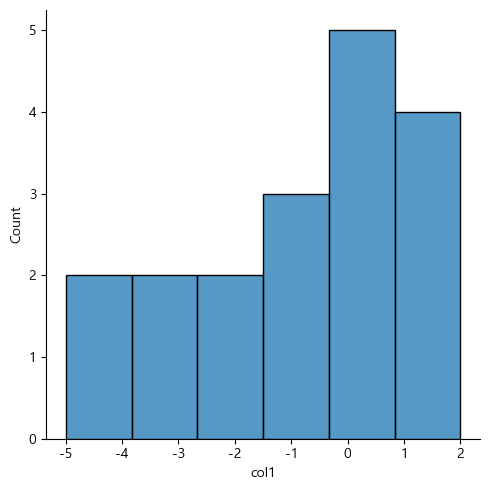

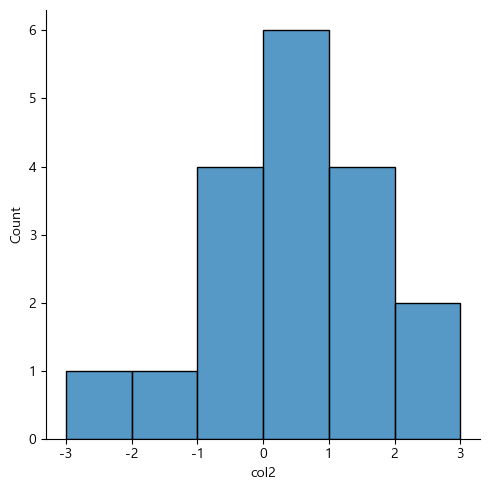

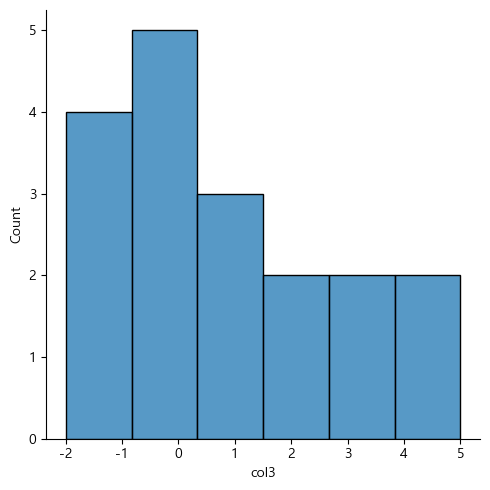

In [ ]:
a = [-5,-4,-3,-3,-2,-2,-1,-1,-1,0,0,0,0,0,1,1,1,2]
b = [-3,-2,-1,-1,-1,-1,0,0,0,0,0,0,1,1,1,1,2,3]
c = [-2,-1,-1,-1,0,0,0,0,0,1,1,1,2,2,3,3,4,5,]
data = {"col1":a,"col2":b,"col3":c}
df = pd.DataFrame(data)

sns.displot(df['col1'])
sns.displot(df['col2'])
sns.displot(df['col3'])

df.skew()  # 음수: 오른쪽 치우침, 0: 치우치지 않음 , 양수: 왼쪽으로 치우침
df.kurtosis()  # 음수: 평평, 0: 정규 분포, 양수: 뾰족

## Boston Housing Dataset


In [25]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import warnings
warnings.filterwarnings('ignore', category=UserWarning)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

boston = pd.read_csv('./boston-housing.csv', header=None, sep=r'\s+')
boston.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE']

display(boston.head())

# 1단계: Boston Housing 데이터 탐색
print("=== Boston Housing 데이터셋 개요 ===")
print(f"데이터 크기: {boston.shape}")
print(f"변수 설명:")

# 변수 설명 딕셔너리
feature_descriptions = {
    'CRIM': '지역별 1인당 범죄율',
    'ZN': '25,000 sq.ft. 이상 주거지역 비율',
    'INDUS': '비소매업 지역 비율', 
    'CHAS': '찰스강 인접 여부 (1: 인접, 0: 비인접)',
    'NOX': '일산화질소 농도 (ppm)',
    'RM': '주택당 평균 방 개수',
    'AGE': '1940년 이전 건축 주택 비율',
    'DIS': '보스턴 고용센터까지 가중거리',
    'RAD': '방사형 고속도로 접근성 지수',
    'TAX': '재산세율',
    'PTRATIO': '학생-교사 비율',
    'B': '흑인 거주 비율 관련 지수',
    'LSTAT': '하위계층 비율',
    'PRICE': '주택 중간값 (단위: $1000)'
}

print(f"\n기본 정보:")
print(boston.info())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


=== Boston Housing 데이터셋 개요 ===
데이터 크기: (506, 14)
변수 설명:

기본 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None


In [ ]:
def get_data_profile(df: pd.DataFrame):
    """종합적인 데이터 프로파일링 함수"""

    print('=' * 50)
    print('종합 데이터 품질 리포트')
    print('=' * 50)

    # 1. 기본 통계
    print(f'\n1. 기본정보')
    print(f'- 데이터 크기: {df.shape[0]}행 x {df.shape[1]}열')
    print(f'- 메모리 사용량: {df.memory_usage(deep=True).sum()/1024**2:.2f}mb')
    print(f'- 수치형 변수: {len(df.select_dtypes(include=['number']).columns)}개')
    print(f'- 범주형 변수: {len(df.select_dtypes(include=['object']).columns)}개')

    # 2. 결측값 분석
    print(f'\n2. 결측값 분석')
    missing_info = df.isnull().sum()
    m_pct = (missing_info / len(df)) * 100
    if missing_info.sum() == 0:
        print('✅ 결측값 없음. 완전')
    else:
        print('⚠️')
        missing_sum = pd.DataFrame({
            '결축수': missing_info,
            '결측율(%)': m_pct,
        }).round(2)
        missing_sum = missing_sum[missing_sum['결측수'] > 0]
        display(missing_sum)

    # 3. 데이터 타입별 분석
    print(f'\n3. 수치형 변수 품질 분석')
    num_cols = df.select_dtypes(include=['number']).columns
    
    quality_report = []
    for col in num_cols:
        col_data = df[col].dropna()
        # 기본 통계
        stats = {
            '변수명': col,
            '평균': col_data.mean(),
            '표준편차': col_data.std(),
            '최솟값': col_data.min(),
            '최댓값': col_data.max(),
            '왜도': col_data.skew(),
            '첨도': col_data.kurtosis(),
        }

        # 이상값 비율 (IQR)
        Q1 = col_data.quantile(0.25)
        Q3 = col_data.quantile(0.75)
        IQR = Q3 - Q1
        mask = (col_data < Q1 - 1.5 * IQR) | (col_data > Q3 + 1.5 * IQR)
        outliers = col_data[mask]
        stats['이상값비율(%)'] = (len(outliers) / len(col_data)) * 100

        # 유일값 비율
        stats['유일값비율(%)'] = (col_data.nunique() / len(col_data)) * 100

        quality_report.append(stats)
    
    quality_df = pd.DataFrame(quality_report).round(3)
    display(quality_df)

    # 4. 분포 이상 감지
    print(f'\n4. 분포 이상 감지')
    print(f'\n- 극심한 왜도 (|skewness|>2)')
    high_skews = quality_df[abs(quality_df['왜도']) > 2]['변수명'].to_list()
    
    if high_skews:  # high_skews 리스트가 값이 있으면,
        print('⚠️')
        for var in high_skews:
            skew_val = quality_df[quality_df['변수명'] == var].iloc[0]['왜도']
            print(f'-- {var}: 왜도 = {skew_val:.3f}')
    else:
        print('-- ✅ 정상 범위 내 분포')

    print('\n- 높은 이상값 비율(>5%)')
    high_outliers = quality_df[quality_df['이상값비율(%)'] > 5]['변수명'].tolist()
    if high_outliers:
        print('⚠️')
        for var in high_outliers:
            outlier_pct = quality_df[quality_df['변수명'] == var].iloc[0]['이상값비율(%)']
            print(f'-- {var}: 이상값 {outlier_pct:.1f}%')
    else:
        print('-- ✅ 이상값 비율 양호')

    return quality_df


get_data_profile(boston)

종합 데이터 폼질 리포트

1. 기본정보
- 데이터 크기: 506행 x 14열
- 메모리 사용량: 0.05mb
- 수치형 변수: 14개
- 범주형 변수: 0개

2. 결측값 분석
✅ 결측값 없음. 완전

3. 수치형 변수 품질 분석


,변수명,평균,표준편차,최솟값,최댓값,왜도,첨도,이상값비율(%),유일값비율(%)
0,CRIM,3.614,8.602,0.006,88.976,5.223,37.131,13.043,99.605
1,ZN,11.364,23.322,0.000,100.000,2.226,4.032,13.439,5.138
2,INDUS,11.137,6.860,0.460,27.740,0.295,-1.234,0.000,15.020
3,CHAS,0.069,0.254,0.000,1.000,3.406,9.638,6.917,0.395
4,NOX,0.555,0.116,0.385,0.871,0.729,-0.065,0.000,16.008
5,RM,6.285,0.703,3.561,8.780,0.404,1.892,5.929,88.142
6,AGE,68.575,28.149,2.900,100.000,-0.599,-0.968,0.000,70.356
7,DIS,3.795,2.106,1.130,12.126,1.012,0.488,0.988,81.423
8,RAD,9.549,8.707,1.000,24.000,1.005,-0.867,0.000,1.779
9,TAX,408.237,168.537,187.000,711.000,0.670,-1.142,0.000,13.043



4. 분포 이상 감지

- 극심한 왜도 (|skewness|>2)
⚠️
-- CRIM: 왜도 = 5.223
-- ZN: 왜도 = 2.226
-- CHAS: 왜도 = 3.406
-- B: 왜도 = -2.890

- 높은 이상값 비율(>5%)
⚠️
-- CRIM: 이상값 13.0%
-- ZN: 이상값 13.4%
-- CHAS: 이상값 6.9%
-- RM: 이상값 5.9%
-- B: 이상값 15.2%
-- PRICE: 이상값 7.9%


,변수명,평균,표준편차,최솟값,최댓값,왜도,첨도,이상값비율(%),유일값비율(%)
0,CRIM,3.614,8.602,0.006,88.976,5.223,37.131,13.043,99.605
1,ZN,11.364,23.322,0.000,100.000,2.226,4.032,13.439,5.138
2,INDUS,11.137,6.860,0.460,27.740,0.295,-1.234,0.000,15.020
3,CHAS,0.069,0.254,0.000,1.000,3.406,9.638,6.917,0.395
4,NOX,0.555,0.116,0.385,0.871,0.729,-0.065,0.000,16.008
5,RM,6.285,0.703,3.561,8.780,0.404,1.892,5.929,88.142
6,AGE,68.575,28.149,2.900,100.000,-0.599,-0.968,0.000,70.356
7,DIS,3.795,2.106,1.130,12.126,1.012,0.488,0.988,81.423
8,RAD,9.549,8.707,1.000,24.000,1.005,-0.867,0.000,1.779
9,TAX,408.237,168.537,187.000,711.000,0.670,-1.142,0.000,13.043


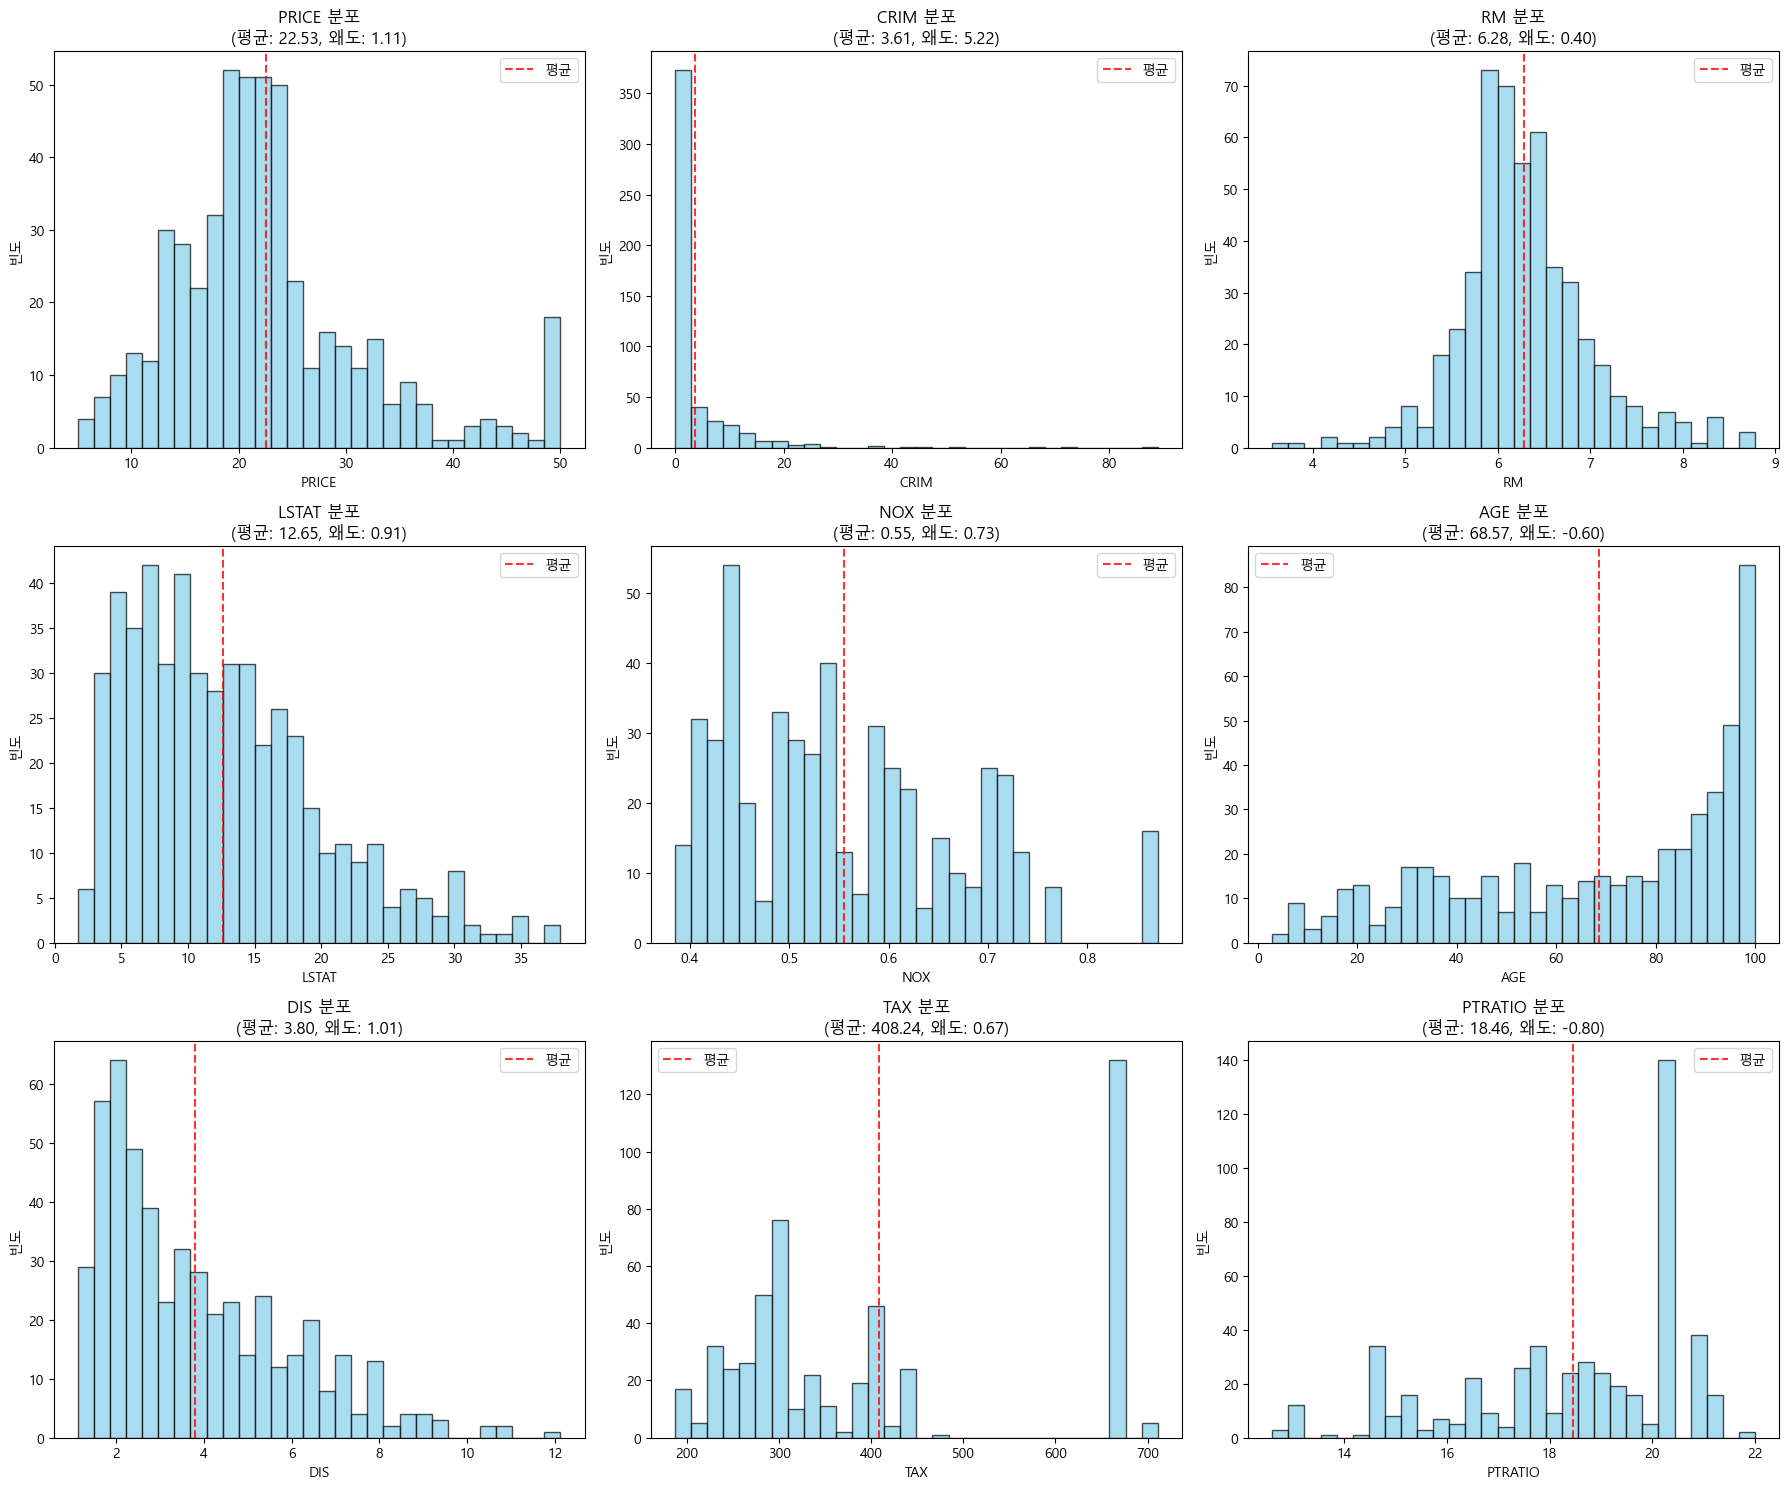

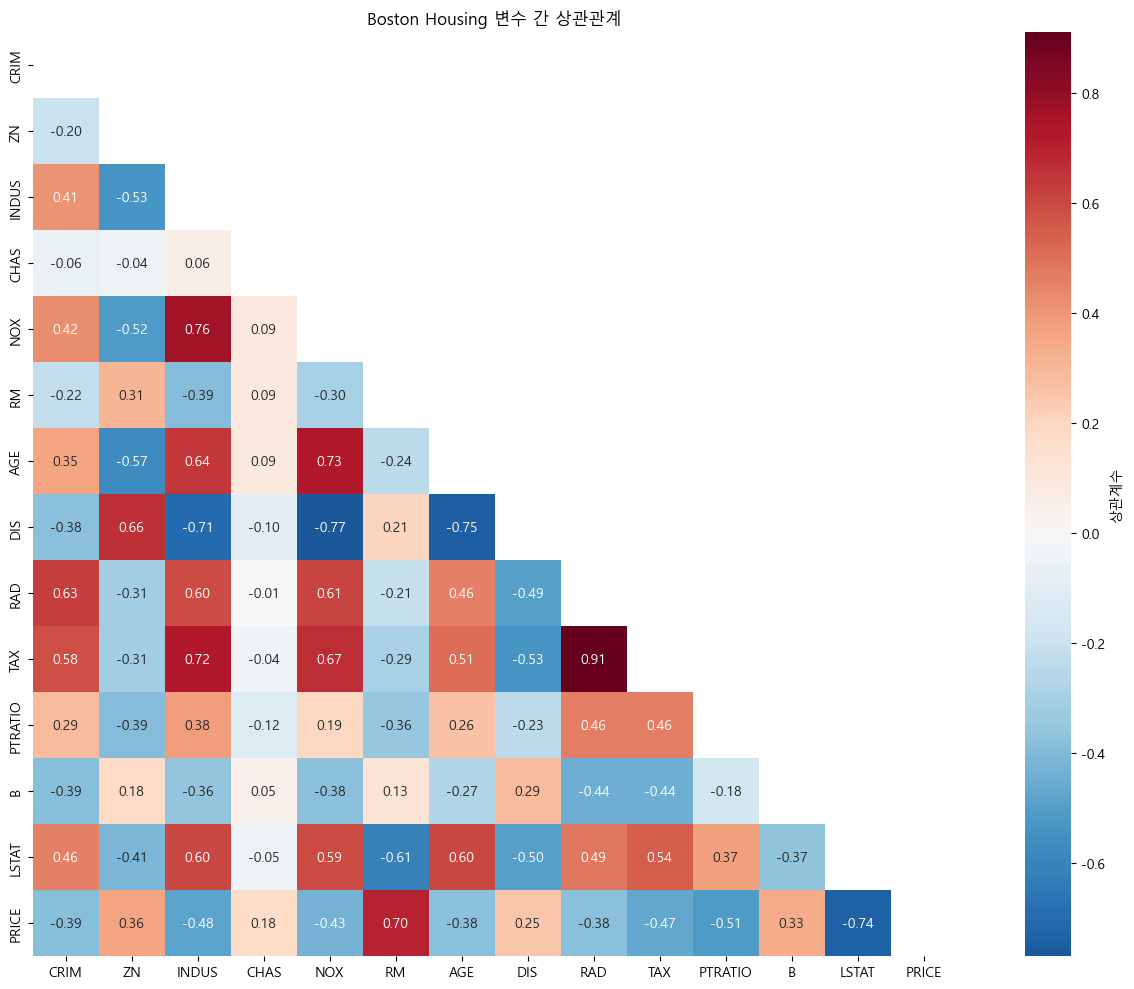

=== 상관관계 분석 결과 ===
PRICE와 상관관계가 높은(>0.5) 변수들:
  LSTAT: 0.738 (음의 상관관계)
  RM: 0.695 (양의 상관관계)
  PTRATIO: 0.508 (음의 상관관계)


In [64]:
# 3단계: 시각적 품질 진단
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.ravel()

# 주요 변수들의 분포 시각화
key_vars = ['PRICE', 'CRIM', 'RM', 'LSTAT', 'NOX', 'AGE', 'DIS', 'TAX', 'PTRATIO']

for i, var in enumerate(key_vars):
    if i < len(axes):
        # 히스토그램과 박스플롯 조합
        ax = axes[i]
        
        # 히스토그램
        ax.hist(boston[var], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
        ax.set_title(f'{var} 분포\n(평균: {boston[var].mean():.2f}, 왜도: {boston[var].skew():.2f})')
        ax.set_xlabel(var)
        ax.set_ylabel('빈도')
        
        # 평균선 표시
        ax.axvline(boston[var].mean(), color='red', linestyle='--', alpha=0.8, label='평균')
        ax.legend()

plt.tight_layout()
plt.show()

# 상관관계 히트맵으로 품질 검증
plt.figure(figsize=(14, 10))
correlation_matrix = boston.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', 
            center=0, cmap='RdBu_r', square=True, cbar_kws={'label': '상관계수'})
plt.title('Boston Housing 변수 간 상관관계')
plt.tight_layout()
plt.show()

print("=== 상관관계 분석 결과 ===")
price_corr = correlation_matrix['PRICE'].abs().sort_values(ascending=False)
print("PRICE와 상관관계가 높은(>0.5) 변수들:")
for var, corr in price_corr.items():
    if var != 'PRICE' and corr > 0.5:
        print(f"  {var}: {corr:.3f} ({'양의 상관관계' if correlation_matrix['PRICE'][var] > 0 else '음의 상관관계'})")


In [ ]:
feature_descriptions = {
    'CRIM': '지역별 1인당 범죄율',
    'ZN': '25,000 sq.ft. 이상 주거지역 비율',
    'INDUS': '비소매업 지역 비율', 
    'CHAS': '찰스강 인접 여부 (1: 인접, 0: 비인접)',
    'NOX': '일산화질소 농도 (ppm)',
    'RM': '주택당 평균 방 개수',
    'AGE': '1940년 이전 건축 주택 비율',
    'DIS': '보스턴 고용센터까지 가중거리',
    'RAD': '방사형 고속도로 접근성 지수',
    'TAX': '재산세율',
    'PTRATIO': '학생-교사 비율',
    'B': '흑인 거주 비율 관련 지수',
    'LSTAT': '하위계층 비율',
    'PRICE': '주택 중간값 (단위: $1000)'
}

In [82]:
# 4단계: 비즈니스 규칙 기반 검증

def business_rule_validation(df):
    """부동산 도메인 지식 기반 검증"""
    
    print("=== 🏠 부동산 도메인 기반 품질 검증 ===")
    issues = []
     # 규칙 1: 방 개수는 1개 이상이어야 함
    low_rooms = df[df['RM'] < 1]
    if len(low_rooms) > 0:
        issues.append(f"⚠️ 방 개수 < 1인 주택: {len(low_rooms)}건")
    else:
        print("✅ 방 개수 정상")

    # 규칙 2: 범죄율은 0 이상이어야 함  
    negative_crime = df[df['CRIM'] < 0]
    if len(negative_crime) > 0:
        issues.append(f"⚠️ 음수 범죄율: {len(negative_crime)}건")
    else:
        print("✅ 범죄율 정상")

    # 규칙 3: 주택 가격은 양수여야 함
    zero_price = df[df['PRICE'] <= 0]
    if len(zero_price) > 0:
        issues.append(f"⚠️ 0 이하 주택가격: {len(zero_price)}건")
    else:
        print("✅ 주택가격 정상")

    # 규칙 4: 비율 변수들은 0-100% 범위 내
    ratio_vars = ['ZN', 'INDUS', 'AGE']
    for var in ratio_vars:
        out_of_range = df[(df[var] < 0) | (df[var] > 100)]
        if len(out_of_range) > 0:
            issues.append(f"⚠️ {var} 비율 범위 초과: {len(out_of_range)}건")
        else:
            print(f"✅ {var} 비율 정상")

    # 규칙 5: 찰스강 변수는 0 또는 1만 가능
    invalid_chas = df[~df['CHAS'].isin([0, 1])]
    if len(invalid_chas) > 0:
        issues.append(f"⚠️ CHAS 값 이상: {len(invalid_chas)}건")
    else:
        print("✅ 찰스강 변수 정상")


    # 규칙 6: 극단적 이상값 검사 (3-sigma 방법)
    print(f"\n=== 극단값 분석 (3-sigma 기준) ===")
    for col in df.select_dtypes(include=['number']).columns:
        mean_val = df[col].mean()
        std_val = df[col].std()
        extreme_outliers = df[abs(df[col] - mean_val) > 3 * std_val]
        
        if len(extreme_outliers) > 0:
            print(f"⚠️ {col}: {len(extreme_outliers)}개 극단값 ({len(extreme_outliers)/len(df)*100:.1f}%)")
        else:
            print(f"✅ {col}: 극단값 없음")

    if not issues:
        print(f"\n🎉 모든 비즈니스 규칙 통과! 데이터 품질 우수")
    else:
        print(f"\n📋 발견된 이슈들:")
        for issue in issues:
            print(f"  {issue}")
    
    return issues

validation_issues = business_rule_validation(boston)

=== 🏠 부동산 도메인 기반 품질 검증 ===
✅ 방 개수 정상
✅ 범죄율 정상
✅ 주택가격 정상
✅ ZN 비율 정상
✅ INDUS 비율 정상
✅ AGE 비율 정상
✅ 찰스강 변수 정상

=== 극단값 분석 (3-sigma 기준) ===
⚠️ CRIM: 8개 극단값 (1.6%)
⚠️ ZN: 14개 극단값 (2.8%)
✅ INDUS: 극단값 없음
⚠️ CHAS: 35개 극단값 (6.9%)
✅ NOX: 극단값 없음
⚠️ RM: 8개 극단값 (1.6%)
✅ AGE: 극단값 없음
⚠️ DIS: 5개 극단값 (1.0%)
✅ RAD: 극단값 없음
✅ TAX: 극단값 없음
✅ PTRATIO: 극단값 없음
⚠️ B: 25개 극단값 (4.9%)
⚠️ LSTAT: 5개 극단값 (1.0%)
✅ PRICE: 극단값 없음

🎉 모든 비즈니스 규칙 통과! 데이터 품질 우수


In [ ]:
# 5단계: 변수 간 논리적 일관성 검증
# 관계 1: 범죄율과 주택가격 (일반적으로 음의 상관관계 예상)
crime_price_corr = boston['CRIM'].corr(boston['PRICE'])
print(f"범죄율-주택가격 상관계수: {crime_price_corr:.3f}")
if crime_price_corr < -0.3:
    print("✅ 예상대로 강한 음의 상관관계 - 논리적으로 타당")
elif crime_price_corr < 0:
    print("⚠️ 약한 음의 상관관계 - 다른 요인들이 영향")
else:
    print("❌ 양의 상관관계 - 논리적으로 의외, 추가 조사 필요")

# 관계 2: 방 개수와 주택가격 (양의 상관관계 예상)
rooms_price_corr = boston['RM'].corr(boston['PRICE'])
print(f"방개수-주택가격 상관계수: {rooms_price_corr:.3f}")
if rooms_price_corr > 0.5:
    print("✅ 강한 양의 상관관계 - 논리적으로 타당")
else:
    print("⚠️ 예상보다 약한 관계")

# 관계 3: 하위계층 비율과 주택가격 (음의 상관관계 예상)
lstat_price_corr = boston['LSTAT'].corr(boston['PRICE'])
print(f"하위계층비율-주택가격 상관계수: {lstat_price_corr:.3f}")

# 주택가격 상위 20% 면서 범죄율 상위 20%
high_price_high_crime = boston[(boston['PRICE'] > boston['PRICE'].quantile(0.8)) & 
                              (boston['CRIM'] > boston['CRIM'].quantile(0.8))]

print(f"\n🚨 이상 패턴 감지:")
print(f"높은 가격 & 높은 범죄율 지역: {len(high_price_high_crime)}곳")
if len(high_price_high_crime) > 0:
    print("해당 지역들의 특성 분석 필요")
    display(high_price_high_crime)
else:
    print('이상 패턴 확인 지역 없음')

범죄율-주택가격 상관계수: -0.388
✅ 예상대로 강한 음의 상관관계 - 논리적으로 타당
방개수-주택가격 상관계수: 0.695
✅ 강한 양의 상관관계 - 논리적으로 타당
하위계층비율-주택가격 상관계수: -0.738

🚨 이상 패턴 감지:
높은 가격 & 높은 범죄율 지역: 4곳
해당 지역들의 특성 분석 필요


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
369,5.66998,0.0,18.1,1,0.631,6.683,96.8,1.3567,24,666.0,20.2,375.33,3.73,50.0
370,6.53876,0.0,18.1,1,0.631,7.016,97.5,1.2024,24,666.0,20.2,392.05,2.96,50.0
371,9.23230,0.0,18.1,0,0.631,6.216,100.0,1.1691,24,666.0,20.2,366.15,9.53,50.0
372,8.26725,0.0,18.1,1,0.668,5.875,89.6,1.1296,24,666.0,20.2,347.88,8.88,50.0


In [84]:
# 품질 점수 종합
def calculate_overall_quality_score(df, issues_count=0):
    """전체 데이터 품질 점수 계산"""
    
    scores = {}
    
    # 완전성 점수 (결측값 기준)
    completeness = (1 - df.isnull().sum().sum() / (len(df) * len(df.columns))) * 100
    scores['완전성'] = completeness
    
    # 일관성 점수 (비즈니스 규칙 위반 기준) 
    consistency = max(0, (1 - issues_count / len(df)) * 100)
    scores['일관성'] = consistency
    
    # 유효성 점수 (극단값 비율 기준)
    validity_issues = 0
    for col in df.select_dtypes(include=['number']).columns:
        Q1, Q3 = df[col].quantile([0.25, 0.75])
        IQR = Q3 - Q1
        outliers = df[(df[col] < Q1 - 3*IQR) | (df[col] > Q3 + 3*IQR)]
        validity_issues += len(outliers)
    
    validity = max(0, (1 - validity_issues / len(df)) * 100)
    scores['유효성'] = validity
    
    # 전체 점수
    overall_score = np.mean(list(scores.values()))
    scores['종합점수'] = overall_score
    
    return scores

quality_scores = calculate_overall_quality_score(boston, len(validation_issues))

print(f"\n=== 📊 최종 품질 평가 ===")
for dimension, score in quality_scores.items():
    if score >= 90:
        status = "🟢 우수"
    elif score >= 70:
        status = "🟡 양호" 
    else:
        status = "🔴 개선필요"
    print(f"{dimension}: {score:.1f}점 {status}")



=== 📊 최종 품질 평가 ===
완전성: 100.0점 🟢 우수
일관성: 100.0점 🟢 우수
유효성: 63.4점 🔴 개선필요
종합점수: 87.8점 🟡 양호
